# Data related tasks

This notebook is a toy example for loading the raw data, processing it to a dataset, saving it, and loading it again through the module.

In [1]:
import sys
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))
# We change the working directory to the root of the project
# Run this only once
root_path = Path.cwd().parent
os.chdir(root_path)
sys.path.append(root_path / "src")


In [2]:
from echocem.data.data import CemDataset
from echocem.data.utils import get_raw_annotations_and_image

data_save_path = root_path / "data/processed/X_train/"
images_path = root_path / "data/raw/X_train/images/"

## How much data do we have?

And how is it organized?

In [4]:
filenames_initial = os.listdir(images_path) # well_n_section_l_patch_m.npy
organized_content = {}
for filename in filenames_initial:
    _, well, _, l, _, m = filename.split("_")
    m = m.split(".")[0]
    if well not in organized_content.keys():
        organized_content[well] = {}
    if l not in organized_content[well].keys():
        organized_content[well][l] = 0
    organized_content[well][l] += 1      


data = []
for puits, sections in sorted(organized_content.items(), key=lambda x: int(x[0])):
    for section in sorted(sections, key=lambda x: int(x)):
        data.append([puits, section, sections[section]])

df = pd.DataFrame(data, columns=["Puits", "Section", "Nombre de Patchs"])
print(f'Nombre de puits: {len(organized_content)}\n')
print(df.to_string(index=False))


Nombre de puits: 6

Puits Section  Nombre de Patchs
    1       0                37
    1       1                37
    1       2                37
    1       3                37
    1       4                37
    1       5                37
    1       6                37
    1       7                37
    1       8                37
    1       9                37
    1      10                37
    1      11                37
    1      12                37
    1      13                37
    1      14                37
    1      15                37
    1      16                37
    1      17                37
    2       0                32
    2       1                32
    2       2                32
    2       3                32
    2       4                32
    2       5                32
    2       6                32
    2       7                32
    2       8                32
    2       9                32
    2      10                32
    2      11       

Loading the annotations:

In [5]:
y_table = y = pd.read_csv(root_path / "data/raw/Y_train.csv", index_col=0)

An example of (annotation, data) pair:

160*272

In [6]:
#help from get_raw_annotations_and_image
print(help(get_raw_annotations_and_image))

Help on function get_raw_annotations_and_image in module echocem.data.utils:

get_raw_annotations_and_image(y_table, images_path, filename)
    corrigée

None


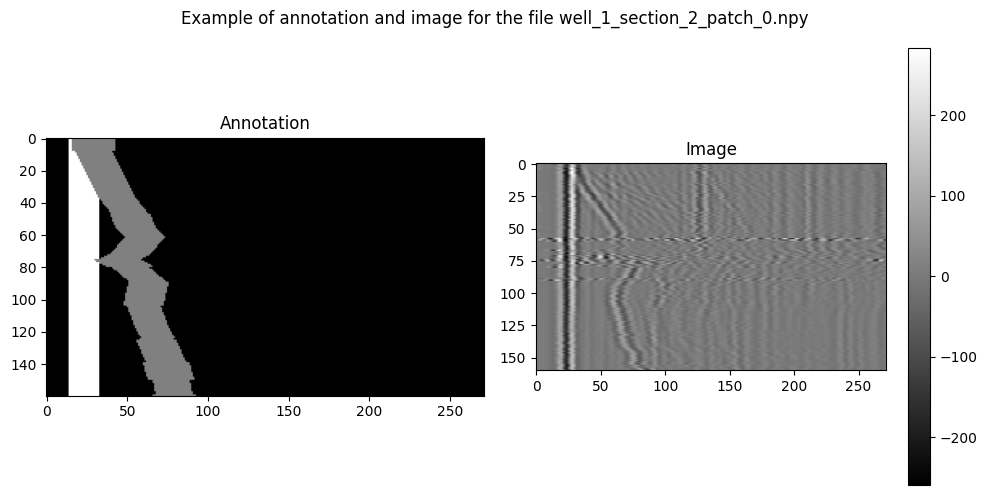

In [7]:
filename = "well_1_section_2_patch_0.npy"
example_annotation, example_image = get_raw_annotations_and_image(y_table, images_path, filename=filename)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(example_annotation, cmap="gray")
plt.colorbar(ax[1].imshow(example_image, cmap="gray"), ax=ax[1])
ax[0].set_title("Annotation")
ax[1].set_title("Image")
plt.tight_layout()
fig.suptitle(f"Example of annotation and image for the file {filename}")
plt.tight_layout()
plt.show()

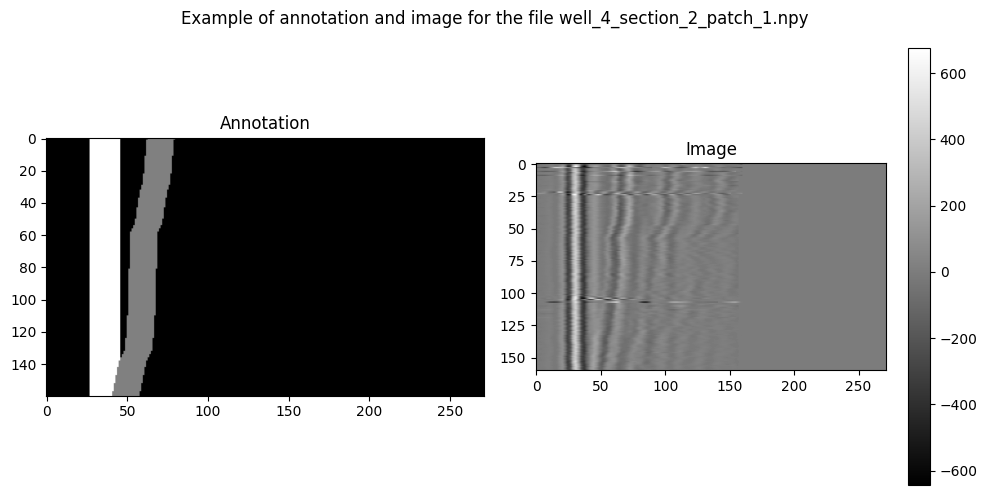

In [8]:
filename = "well_4_section_2_patch_1.npy"
example_annotation, example_image = get_raw_annotations_and_image(y_table, images_path, filename=filename)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(example_annotation, cmap="gray")
plt.colorbar(ax[1].imshow(example_image, cmap="gray"), ax=ax[1])
ax[0].set_title("Annotation")
ax[1].set_title("Image")
plt.tight_layout()
fig.suptitle(f"Example of annotation and image for the file {filename}")
plt.tight_layout()
plt.show()

### Reprocessing the dataset

Here, we reformat the dataset. At the moment, the raw dataset contains patches of data. We aggregate the data to large images, one for each section of each well.

We also create another format, were we just convert the .csv files into .npy files, for easier loading and compatibility with the data loader.

**Data Aggregation**

In [9]:
file_information = {
    'well': [],
    'section': [],
    'files': []
}

for file in filenames_initial:
    _, well, _, l, _, m = file.split("_")
    m = m.split(".")[0]
    file_information['well'].append(well)
    file_information['section'].append(l)
    file_information['files'].append(file)

df = pd.DataFrame(file_information)

# group by well and section
df = df.groupby(['well', 'section']).agg({'files': list}).reset_index()

for index, row in df.iterrows():
    well = row['well']
    section = row['section']
    files = row['files']
    files = sorted(files, key=lambda x: int(x.split("_")[-1].split(".")[0]))
    print(f"Processing well {well} section {section}")
    # get the data and the image for each file
    y_and_x = [get_raw_annotations_and_image(y_table, images_path, filename=file) for file in files]
    # concatenate the data and the images
    ys = np.concatenate([y for y, _ in y_and_x], axis=0)
    xs = np.concatenate([x for _, x in y_and_x], axis=0)
    # save the data and the images
    os.makedirs(data_save_path / "annotations", exist_ok=True)
    os.makedirs(data_save_path / "images", exist_ok=True)
    np.save(data_save_path / f"annotations/{well}_{section}.npy", ys)
    np.save(data_save_path / f"images/{well}_{section}.npy", xs)

Processing well 1 section 0
Processing well 1 section 1
Processing well 1 section 10
Processing well 1 section 11
Processing well 1 section 12
Processing well 1 section 13
Processing well 1 section 14
Processing well 1 section 15
Processing well 1 section 16
Processing well 1 section 17
Processing well 1 section 2
Processing well 1 section 3
Processing well 1 section 4
Processing well 1 section 5
Processing well 1 section 6
Processing well 1 section 7
Processing well 1 section 8
Processing well 1 section 9
Processing well 2 section 0
Processing well 2 section 1
Processing well 2 section 10
Processing well 2 section 11
Processing well 2 section 12
Processing well 2 section 13
Processing well 2 section 14
Processing well 2 section 15
Processing well 2 section 16
Processing well 2 section 17
Processing well 2 section 18
Processing well 2 section 19
Processing well 2 section 2
Processing well 2 section 20
Processing well 2 section 21
Processing well 2 section 22
Processing well 2 section 2

**Loading the aggregated data**

(1760, 272)


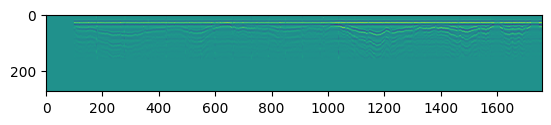

In [ ]:
# try to load the data
data = np.load(data_save_path / "images/4_5.npy")
print(data.shape)
plt.imshow(data.T)
plt.show()

data = np.load(data_save_path / "annotations/4_5.npy")
print(data.shape)
plt.imshow(data)
plt.show()

In [19]:
#plot puits 3 
data = np.load(data_save_path / "images/3_3.npy")
print(data.shape)
plt.imshow(data.T)

#plot associated annotations
data = np.load(data_save_path / "annotations/3_3.npy")
print(data.shape)
plt.imshow(data.T)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Mathis\\Desktop\\Github Projects\\MVA\\EchoCemDataChallenge\\data\\raw\\X_train\\images\\3_3.npy'

**Mean and standard deviation of the data**

In [12]:
# Compute the mean and std of the training set
mean = 0
std = 0
n_files = 0
for file in (data_save_path / "images/").iterdir():
    if int(file.name.split('_')[0]) in [3, 4]:
        continue
    data = np.load(file)
    mean += np.mean(data)
    std += data.std() ** 2
    n_files += 1

mean /= n_files
std /= n_files
std = np.sqrt(std)
print(f"Mean: {mean}, std: {std}")

Mean: -0.2745382931759886, std: 28.799882604526953


**Using the dataset, dataloader and hydra**

In [3]:
dataset = CemDataset(images_path=data_save_path / "images/", annotations_path=data_save_path / "annotations/", excluded_wells=[2, 3, 4])
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
batch = next(iter(dataloader))
print(len(batch))

Dataset loaded with 397206 crops.
2


In [4]:
from hydra.utils import instantiate
from omegaconf import OmegaConf
# load the configuration file
cfg = OmegaConf.load("src/echocem/conf/data.yaml")
# instantiate the dataset
dataloader = instantiate(cfg.train_dataloader)

In [6]:
len(dataloader)

2623

In [3]:
%%time
import tqdm
# iterate over the dataset
for batch in tqdm.tqdm(dataloader):
    pass

100%|██████████| 2623/2623 [12:45<00:00,  3.43it/s]

CPU times: total: 11min 16s
Wall time: 12min 45s


**Formatting the .csv to .npy files**

In [17]:
from rich.progress import Progress

with Progress() as progress:
    task = progress.add_task("[red]Processing...", total=len(y_table))

    data_save_path = root_path / "data/raw/X_train/"
    os.makedirs(data_save_path / "patch_annotations", exist_ok=True)
    for index, row in y_table.iterrows():
        data = row.values
        mask = data.reshape(-1, 272)
        save_path = data_save_path / "patch_annotations" / (index + ".npy")
        np.save(save_path, mask)
        progress.advance(task)

Output()

**Using the validation set**

In [18]:
dataloader = instantiate(cfg.validation_dataloader)

Preloading data into memory...


KeyboardInterrupt: 